# Drawing Conclusions

  
Draw conclusions and create visuals to communicate results in the Jupyter notebook below! Make sure to address the following questions.   
   
**Q1:** Are more unique models using alternative fuels in 2018 compared to 2008? By how much?    
**Q2:** How much have vehicle classes improved in fuel economy (increased in mpg)?   
**Q3:** What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)   
**Q4:** What features are associated with better fuel economy (mpg)?    


Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load datasets

In [3]:
df_08 = pd.read_csv("clean_08.csv")
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [4]:
df_18 = pd.read_csv("clean_18.csv")
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [5]:
# Checking the type of fuel we have

In [6]:
df_08["fuel"].unique()

array(['Gasoline', 'CNG', 'ethanol', 'gas'], dtype=object)

In [7]:
df_18["fuel"].unique()

array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'], dtype=object)

* In 2008, we have : CNG, Ethanol
* In 2018, we have : Ethanol, Electricity

In [8]:
# Cars using alternative fuel in 2008
alt_08 = df_08.query("fuel in ['CNG','ethanol']")["model"].unique()
alt_08

array(['HONDA Civic', 'MERCEDES-BENZ C300'], dtype=object)

In [9]:
# Number of car using alternative fuel in 2008
count_alt_08 = len(alt_08)
count_alt_08

2

In [10]:
# Cars using alternative fuel in 2018
alt_18 = df_18.query("fuel in ['Ethanol', 'Electricity']")["model"].unique()
alt_18

array(['CHEVROLET Impala', 'CHEVROLET Silverado 15',
       'CHEVROLET Suburban 1500', 'CHEVROLET Tahoe 1500', 'CHRYSLER 300',
       'DODGE Charger', 'GMC Sierra 15', 'GMC Yukon 1500',
       'GMC Yukon 1500 XL', 'GMC Yukon XL 1500', 'JEEP Cherokee',
       'MERCEDES-BENZ CLA250 4Matic', 'MERCEDES-BENZ GLA250 4Matic',
       'MERCEDES-BENZ GLE350 4Matic', 'TOYOTA Sequoia FFV',
       'TOYOTA Tundra FFV', 'BMW 330e', 'BMW 530e', 'BMW 740e',
       'CHEVROLET Volt', 'FORD Fusion Energi Plug-in Hybrid',
       'KARMA Revero', 'MINI Cooper SE Countryman All4', 'VOLVO S90',
       'VOLVO XC 60', 'VOLVO XC 90'], dtype=object)

In [11]:
# Number of car using alternative fuel in 2018
count_alt_18 = len(alt_18)
count_alt_18

26

In [12]:
count_alt_18 - count_alt_08

24

Since 2008, the number of unique model using alternative sources of fuel increased by 24.

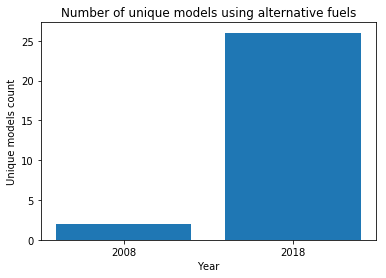

In [13]:
# Ploting the number of unique models using alternative sources of fuel in 2008 and 2018

plt.bar(["2008", "2018"], [count_alt_08, count_alt_18])

plt.title("Number of unique models using alternative fuels")
plt.xlabel("Year")
plt.ylabel("Unique models count");

In [14]:
# Observing the proportion of unique models using alternative sources of fuel in 2008 and 2018

In [15]:
#total unique models for each year
total_08 = df_08["model"].nunique()
total_18 = df_18["model"].nunique()

total_08, total_18

(377, 357)

In [16]:
#proportion of unique models for each year
prop_08 = count_alt_08/total_08
prop_18 = count_alt_18/total_18

prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

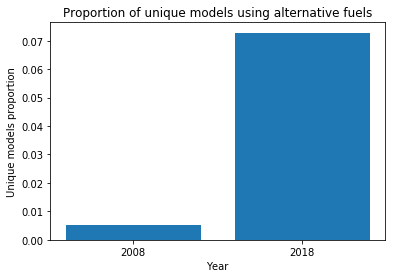

In [17]:
# Ploting the proportion of unique models using alternative sources of fuel in 2008 and 2018
plt.bar(["2008","2018"], [prop_08, prop_18])

plt.title("Proportion of unique models using alternative fuels")
plt.xlabel("Year")
plt.ylabel("Unique models proportion");

### Q2: How much have vehicle classes improved in fuel economy?  

In [18]:
# Checking the vehicle classes we have

In [19]:
df_08["veh_class"].unique()

array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
       'minivan', 'van', 'pickup'], dtype=object)

In [20]:
df_18["veh_class"].unique()

array(['small SUV', 'small car', 'midsize car', 'large car',
       'standard SUV', 'station wagon', 'pickup', 'special purpose',
       'minivan'], dtype=object)

In [21]:
# Checking the average fuel economy for each vehicle class

In [22]:
veh_08 = df_08.groupby("veh_class")["cmb_mpg"].mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [23]:
veh_18 = df_18.groupby("veh_class")["cmb_mpg"].mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [24]:
# Checking how much the economy in fuel has improved for each class

In [25]:
increase = veh_18 - veh_08
increase

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

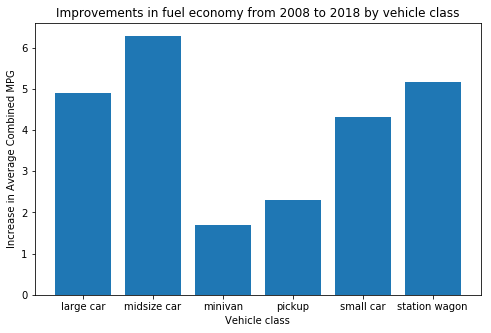

In [26]:
# Plotting the increase in economy for the vehicle classes that exist in both years

increase.dropna(inplace=True)

plt.subplots(figsize=(8,5))
plt.bar(increase.index, increase)


plt.title("Improvements in fuel economy from 2008 to 2018 by vehicle class")
plt.xlabel("Vehicle class")
plt.ylabel("Increase in Average Combined MPG");

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [27]:
# Characteristics of SmartWay vehicles in 2008

In [28]:
df_08["smartway"].unique()

array(['no', 'yes'], dtype=object)

In [29]:
smart_08 = df_08.query(" smartway == {}".format("'yes'"))
smart_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [30]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [31]:
# TODO : further exploring this dataset on 2008 smartway vehicles

In [32]:
# Characteristics of SmartWay vehicles in 2018

In [33]:
df_18["smartway"].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [34]:
smart_18 = df_18.query(" smartway in ['Yes', 'Elite'] ")
smart_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes


In [35]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [36]:
# TODO : further exploring this dataset on 2018 smartway vehicles

### Q4: What features are associated with better fuel economy?

In [37]:
# Selecting feature that have the top 50% fuel economy ratings

In [38]:
top_08 = df_08.query(" cmb_mpg > cmb_mpg.mean() ")
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [39]:
top_18 = df_18.query(" cmb_mpg > cmb_mpg.mean() ")
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000
